In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import subprocess
import seaborn as sns
from pandas_profiling import ProfileReport

#SKlearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Machine Learning Final Project/mushrooms.csv')
# data.head()

data = pd.read_csv('/content/drive/MyDrive/Machine Learning Final Project/data_feature_engineering.csv')
data.head()

,Unnamed: 0,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,x,s,n,t,others,f,c,n,...,s,s,w,w,w,o,p,k,s,u
1,1,0,x,s,y,t,a,f,c,b,...,s,s,w,w,w,o,p,n,n,g
2,2,0,others,s,w,t,l,f,c,b,...,s,s,w,w,w,o,p,n,n,others
3,3,1,x,y,w,t,others,f,c,n,...,s,s,w,w,w,o,p,k,s,u
4,4,0,x,s,g,f,n,f,w,b,...,s,s,w,w,w,o,e,n,a,g


In [5]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,train_X,train_y,test_X,test_y):
    
    # test
    test_rmse = mean_squared_error(test_y, model.predict(test_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, train_X, train_y, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(train_y, model.predict(train_X)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

In [6]:
%matplotlib inline

In [7]:
# # Update target variable to poisonous
# data.loc[data['class']=='p', 'class'] = 1
# data.loc[data['class']=='e', 'class'] = 0
# data=data.rename(columns={'class':'poisonous'})

In [8]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

In [9]:
y = data['poisonous']
y=y.astype('int')

In [10]:
X = data.iloc[: , 2:]
X = pd.get_dummies(X, prefix = 'is')
X

,is_f,is_k,is_others,is_x,is_others,is_s,is_y,is_e,is_g,is_n,...,is_n,is_s,is_v,is_y,is_d,is_g,is_l,is_others,is_p,is_u
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8120,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
8121,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8122,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [11]:
# X,y = data.drop('poisonous',1), data['poisonous']
# X = pd.get_dummies(X, prefix = 'is')
# y=y.astype('int')

In [12]:
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [13]:
print(train_X.shape)
print(test_X.shape)

(6499, 84)
(1625, 84)


In [14]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

1. PCA

In [15]:
#PCA Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [16]:
#Application of PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [17]:
#Explaining Eigenvalues & Explained Variance
print("Eigenvalues:")
print(pca.explained_variance_)
print()

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[1.02813018e+01 9.25317393e+00 7.29281126e+00 6.66408716e+00
 4.87271097e+00 3.45671068e+00 2.49317571e+00 2.13736612e+00
 1.76924683e+00 1.66231851e+00 1.44879197e+00 1.32003504e+00
 1.28787296e+00 1.22939739e+00 1.16021142e+00 1.15330632e+00
 1.10818329e+00 1.09387226e+00 1.07644411e+00 1.07214656e+00
 1.06108594e+00 1.05325036e+00 1.05191612e+00 1.01915603e+00
 9.91957573e-01 9.64877626e-01 9.55517245e-01 9.36212316e-01
 9.09134424e-01 8.78472903e-01 8.32054185e-01 8.19086678e-01
 8.07994352e-01 7.67081351e-01 7.30959692e-01 7.14341113e-01
 6.79943199e-01 6.28603695e-01 6.11123329e-01 5.92614575e-01
 5.32650993e-01 4.80142559e-01 4.67275190e-01 4.39302634e-01
 4.31936812e-01 3.69356698e-01 3.65794121e-01 3.50522487e-01
 2.89019714e-01 2.55778447e-01 2.23408705e-01 1.92092006e-01
 1.79826918e-01 1.45020551e-01 1.21119946e-01 9.09596267e-02
 6.44376496e-02 5.74236152e-02 4.58700774e-02 3.65839219e-02
 1.75544704e-02 1.40170010e-02 1.69986816e-03 2.12288673e-29
 6.03363138

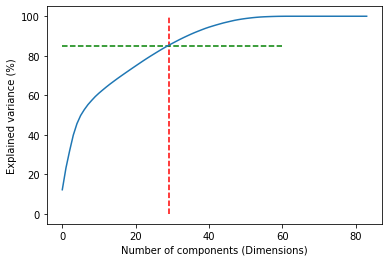

In [18]:
# Making the scree line plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.vlines(x=29, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=85, xmax=60, xmin=0, colors="g", linestyles="--")

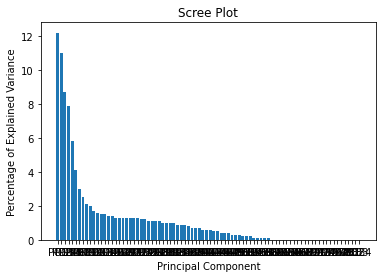

In [19]:
# Making the scree bar plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [20]:
#Apply PCA for modeling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [21]:
print(X_pca.head())
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0 -3.143275 -1.409966 -0.097083  1.372999  1.484941 -3.452296  5.520177   
1 -3.892931  0.707328  1.185102  1.391278  4.393990 -2.396652 -2.401368   
2 -4.824224  0.086063  1.157668  1.132494  5.914778 -1.804054 -2.580956   
3 -3.358469 -0.589863 -0.973615  1.309419  2.086652 -3.552879  5.224120   
4 -2.645336 -1.430815 -0.443588  4.490201 -3.722461  0.068551 -1.030532   

         7         8         9   ...        19        20        21        22  \
0  1.328878  2.133545 -0.557120  ... -0.282068 -0.489342 -0.107256 -0.028117   
1 -1.227165 -0.227901  1.283397  ... -0.361142 -0.912346 -1.534186  2.942004   
2 -1.787586 -1.946470 -0.073619  ...  1.518590  0.536211  1.549127 -2.861155   
3  0.568613  2.572028 -1.087808  ...  1.731590  1.465780 -0.721842 -0.631298   
4 -0.611366  1.278429  0.916040  ...  0.765361 -0.907048  0.443440  0.307362   

         23        24        25        26        27        28  
0  0

In [22]:
# Make train and test sets based on PCA
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, train_size = 0.8, test_size = 0.2, stratify = y)

In [23]:
print(train_X_pca.shape)
print(test_X_pca.shape)

(6499, 29)
(1625, 29)


In [24]:
train_X = train_X_pca
train_y = train_y
test_X = test_X_pca
test_y= test_y

In [25]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

2.1 Losgistic Regression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(train_X,train_y)
y_pred_log_reg = log_reg.predict(test_X)
acc_log_reg = round(log_reg.score(test_X, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

98.83 percent


In [27]:
precision_log_reg = metrics.precision_score(test_y, y_pred_log_reg)
recall_log_reg = metrics.recall_score(test_y, y_pred_log_reg)
f1_log_reg = metrics.f1_score(test_y, y_pred_log_reg)

print("Precision:",precision_log_reg)
print("Recall:",recall_log_reg)
print("F1:",f1_log_reg)

Precision: 0.9897435897435898
Recall: 0.9859514687100894
F1: 0.9878438899552143


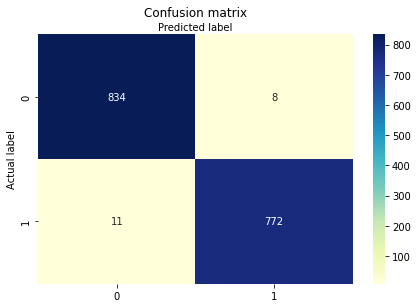

In [28]:
draw_confusion_matrix(log_reg,test_X,test_y)

In [29]:
compare_RMSE(log_reg,train_X, train_y,test_X,test_y)

Test set RMSE: 0.10813097471264972
CV RMSE: 0.10525822337360709
Training set RMSE: 0.10525505917128614


2.2 SGDC

In [30]:
SGDC = SGDClassifier()
SGDC.fit(train_X,train_y)
y_pred_SGDC = SGDC.predict(test_X)
acc_SGDC = round(SGDC.score(test_X, test_y) * 100, 2)
print (str(acc_SGDC) + ' percent')

98.34 percent


In [31]:
precision_SGDC = metrics.precision_score(test_y, y_pred_SGDC)
recall_SGDC = metrics.recall_score(test_y, y_pred_SGDC)
f1_SGDC = metrics.f1_score(test_y, y_pred_SGDC)

print("Precision:",precision_SGDC)
print("Recall:",recall_SGDC)
print("F1:",f1_SGDC)

Precision: 0.9947643979057592
Recall: 0.9706257982120051
F1: 0.9825468648998061


In [32]:
compare_RMSE(SGDC,train_X, train_y,test_X,test_y)

Test set RMSE: 0.12890067732709792
CV RMSE: 0.1283089935239538
Training set RMSE: 0.12466295535898683


2.3 Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=0.2,random_state=1)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(test_X)
acc_rf = round(rf.score(test_X, test_y) * 100, 2)
print (str(acc_rf) + ' percent')

90.95 percent


In [34]:
precision_rf = metrics.precision_score(test_y, y_pred_rf)
recall_rf = metrics.recall_score(test_y, y_pred_rf)
f1_rf = metrics.f1_score(test_y, y_pred_rf)

print("Precision:",precision_rf)
print("Recall:",recall_rf)
print("F1:",f1_rf)

Precision: 0.9803625377643505
Recall: 0.8288633461047255
F1: 0.8982698961937716


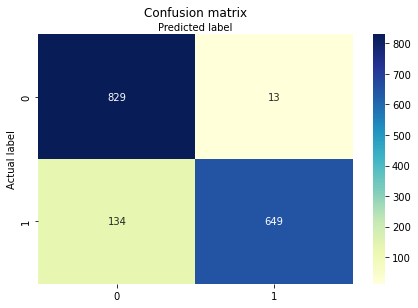

In [35]:
draw_confusion_matrix(rf,test_X,test_y)

In [36]:
compare_RMSE(rf,train_X, train_y,test_X,test_y)

Test set RMSE: 0.3007682470965618
CV RMSE: 0.2956309408608364
Training set RMSE: 0.29692997553434425


2.4 Decision Tree

In [37]:
dt = DecisionTreeClassifier(max_depth=10,
                           min_samples_leaf=0.18,
                           random_state=1)

# Fit dt to the training set
dt.fit(train_X, train_y)
y_pred_dt = dt.predict(test_X)
acc_dt = round(dt.score(test_X, test_y) * 100, 2)
print (str(acc_dt) + ' percent')

92.31 percent


In [38]:
precision_dt = metrics.precision_score(test_y, y_pred_dt)
recall_dt = metrics.recall_score(test_y, y_pred_dt)
f1_dt = metrics.f1_score(test_y, y_pred_dt)

print("Precision:",precision_dt)
print("Recall:",recall_dt)
print("F1:",f1_dt)

Precision: 0.8655555555555555
Recall: 0.9948914431673053
F1: 0.9257278669043374


In [39]:
compare_RMSE(dt,train_X, train_y,test_X,test_y)

Test set RMSE: 0.2773500981126146
CV RMSE: 0.2953726329500412
Training set RMSE: 0.29380430980041994


2.5 SVC

In [40]:
svc = SVC()
svc.fit(train_X,train_y)
y_pred_svc = svc.predict(test_X)
acc_svc=round(svc.score(test_X,test_y)*100,2)
print(str(acc_svc)+' percent')

99.88 percent


In [41]:
precision_svc = metrics.precision_score(test_y, y_pred_svc)
recall_svc = metrics.recall_score(test_y, y_pred_svc)
f1_svc = metrics.f1_score(test_y, y_pred_svc)

print("Precision:",precision_svc)
print("Recall:",recall_svc)
print("F1:",f1_svc)

Precision: 1.0
Recall: 0.9974457215836526
F1: 0.9987212276214833


In [42]:
compare_RMSE(svc,train_X, train_y,test_X,test_y)

Test set RMSE: 0.03508232077228117
CV RMSE: 0.02480694691784169
Training set RMSE: 0.012404427682367956


Summary

In [43]:
models =pd.DataFrame({
    'Model':['Logistic Regression','SGDClassifier','Random Forest',
             'Decision Tree','SVC'],
    
    'Accuracy':[acc_log_reg,acc_SGDC ,acc_rf,acc_dt,acc_svc],
    'F1 Score':[f1_log_reg,f1_SGDC ,f1_rf,f1_dt,f1_svc]
})

models.sort_values(by = 'F1 Score', ascending = False)

,Model,Accuracy,F1 Score
4,SVC,99.88,0.998721
0,Logistic Regression,98.83,0.987844
1,SGDClassifier,98.34,0.982547
3,Decision Tree,92.31,0.925728
2,Random Forest,90.95,0.898270


**MCA**

In [44]:
data2 = pd.read_csv('/content/drive/MyDrive/Machine Learning Final Project/data_feature_engineering.csv')
data2.head()

,Unnamed: 0,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,x,s,n,t,others,f,c,n,...,s,s,w,w,w,o,p,k,s,u
1,1,0,x,s,y,t,a,f,c,b,...,s,s,w,w,w,o,p,n,n,g
2,2,0,others,s,w,t,l,f,c,b,...,s,s,w,w,w,o,p,n,n,others
3,3,1,x,y,w,t,others,f,c,n,...,s,s,w,w,w,o,p,k,s,u
4,4,0,x,s,g,f,n,f,w,b,...,s,s,w,w,w,o,e,n,a,g


In [45]:
# pip install --user prince

In [46]:
data2

,Unnamed: 0,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,x,s,n,t,others,f,c,n,...,s,s,w,w,w,o,p,k,s,u
1,1,0,x,s,y,t,a,f,c,b,...,s,s,w,w,w,o,p,n,n,g
2,2,0,others,s,w,t,l,f,c,b,...,s,s,w,w,w,o,p,n,n,others
3,3,1,x,y,w,t,others,f,c,n,...,s,s,w,w,w,o,p,k,s,u
4,4,0,x,s,g,f,n,f,w,b,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,0,k,s,n,f,n,a,c,b,...,s,s,others,others,others,o,p,others,c,l
8120,8120,0,x,s,n,f,n,a,c,b,...,s,s,others,others,others,o,p,others,v,l
8121,8121,0,f,s,n,f,n,a,c,b,...,s,s,others,others,others,o,p,others,c,l
8122,8122,1,k,y,n,f,y,f,c,n,...,s,k,w,w,w,o,e,w,v,l


In [47]:
# df = pd.get_dummies(data, drop_first=True)

In [48]:
X = data2.iloc[: , 2:]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,others,f,c,n,others,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,others,e,...,s,s,w,w,w,o,p,n,n,g
2,others,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,others
3,x,y,w,t,others,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,others,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,others,e,...,s,s,others,others,others,o,p,others,c,l
8120,x,s,n,f,n,a,c,b,others,e,...,s,s,others,others,others,o,p,others,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,s,others,others,others,o,p,others,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


In [49]:
!pip install prince
!pip install mca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import prince

In [51]:
import mca

In [52]:
mca = prince.MCA(
    n_components=100,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )

In [53]:
fit1 = mca.fit_transform(X)

In [54]:
X2 = fit1.iloc[:,:31]

In [55]:
fit1

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.665384,0.035568,-0.038294,0.326719,0.035412,-0.556577,1.251084,-0.007330,-0.465549,-0.217733,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
1,-0.688068,-0.328945,0.301510,0.266643,0.917169,-0.374852,-0.438307,0.047838,-0.060796,-0.244691,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
2,-0.948490,-0.266090,0.314615,0.216270,1.288394,-0.211443,-0.452595,0.267757,0.146616,-0.453259,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
3,-0.671189,-0.137383,-0.222109,0.308350,0.177775,-0.588485,1.217276,0.121046,-0.458925,-0.033292,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
4,-0.563261,0.025793,-0.140623,0.766965,-0.691705,0.058618,-0.325925,0.084427,-0.379034,-0.426734,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.664455,1.074861,2.520560,-0.747620,-0.939584,-0.514539,-0.122600,0.118500,0.079610,-0.000095,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
8120,-0.594704,0.880404,2.185388,-0.712355,-0.928818,-0.896409,-0.117854,0.328801,0.302292,0.002984,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
8121,-0.672438,0.892883,2.334520,-0.835551,-0.980497,-0.676167,-0.145977,0.098450,0.183043,0.114177,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011
8122,0.409045,1.055831,-0.133533,0.135084,0.163850,-0.105600,-0.049500,0.029352,-0.005050,0.271390,...,0.048658,0.067292,0.026592,-0.051683,0.025592,0.054659,0.075078,-0.00025,-0.043163,-0.089011


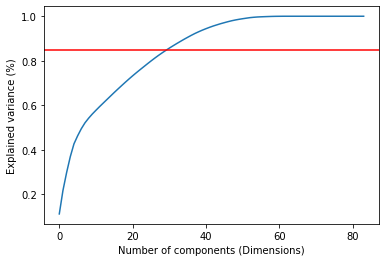

In [56]:
# 31 components returns about 85% variancce explained
plt.plot(np.cumsum(mca.explained_inertia_))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.axhline(y=0.85, color='r')

In [57]:
np.cumsum(mca.explained_inertia_)

array([0.11225024, 0.21779835, 0.29826363, 0.36927611, 0.42681883,
       0.46290526, 0.49474815, 0.52120975, 0.54215375, 0.56080152,
       0.57775391, 0.5943235 , 0.6102398 , 0.62611281, 0.64198583,
       0.65782681, 0.67323914, 0.68843995, 0.70347355, 0.71812484,
       0.73240269, 0.74619738, 0.75961649, 0.77282259, 0.78600775,
       0.79892966, 0.81149362, 0.82353758, 0.83503907, 0.84611946,
       0.85678011, 0.8670174 , 0.87704302, 0.88670981, 0.89628798,
       0.90537808, 0.91427578, 0.9227119 , 0.93031553, 0.93751154,
       0.94411451, 0.95039815, 0.95625259, 0.96144367, 0.96656425,
       0.97112509, 0.97560039, 0.97967153, 0.98317246, 0.9862144 ,
       0.98885956, 0.99131578, 0.99372319, 0.9953461 , 0.99663054,
       0.99746283, 0.99810831, 0.99872228, 0.99926062, 0.99962621,
       0.99982173, 0.99997905, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

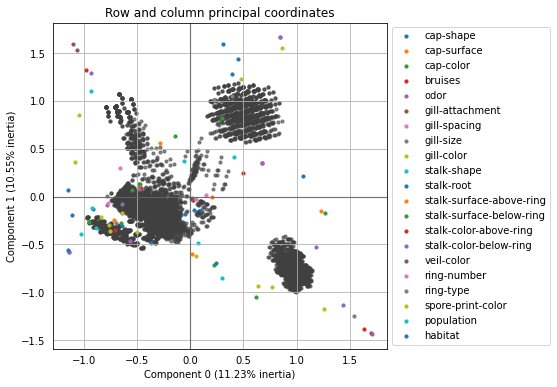

In [58]:
ax = mca.plot_coordinates(
    X=X,
    ax=None,
    figsize=(6, 6),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    # row_groups=None,
    show_column_points=True,
    column_points_size=10,
    show_column_labels=False,
    legend_n_cols=1
    )
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax
#ax.get_figure().savefig('images/mca_coordinates.svg')

In [59]:
y = data['poisonous']
y=y.astype('int')

In [60]:
train_X,test_X,train_y,test_y = train_test_split(X2,y,train_size=0.8,test_size=0.2)

In [61]:
print(train_X.shape)
print(test_X.shape)

(6499, 31)
(1625, 31)


2.1 Logistic Regression

In [62]:
log_reg = LogisticRegression()
log_reg.fit(train_X,train_y)
y_pred_log_reg = log_reg.predict(test_X)
acc_log_reg = round(log_reg.score(test_X, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

98.15 percent


In [63]:
precision_log_reg = metrics.precision_score(test_y, y_pred_log_reg)
recall_log_reg = metrics.recall_score(test_y, y_pred_log_reg)
f1_log_reg = metrics.f1_score(test_y, y_pred_log_reg)

print("Precision:",precision_log_reg)
print("Recall:",recall_log_reg)
print("F1:",f1_log_reg)

Precision: 0.9838909541511772
Recall: 0.9790382244143033
F1: 0.9814585908529048


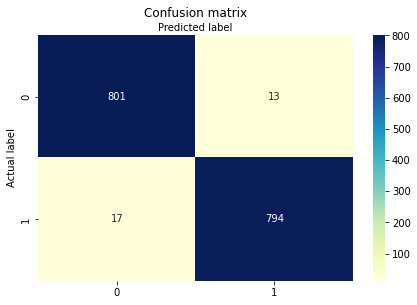

In [64]:
draw_confusion_matrix(log_reg,test_X,test_y)

In [65]:
# compare_RMSE(log_reg,train_X, train_y,test_X,test_y)

2.2 SGDC

In [67]:
SGDC = SGDClassifier()
SGDC.fit(train_X,train_y)
y_pred_SGDC = SGDC.predict(test_X)
acc_SGDC = round(SGDC.score(test_X, test_y) * 100, 2)
print (str(acc_SGDC) + ' percent')

98.52 percent


In [68]:
precision_SGDC = metrics.precision_score(test_y, y_pred_SGDC)
recall_SGDC = metrics.recall_score(test_y, y_pred_SGDC)
f1_SGDC = metrics.f1_score(test_y, y_pred_SGDC)

print("Precision:",precision_SGDC)
print("Recall:",recall_SGDC)
print("F1:",f1_SGDC)

Precision: 0.984009840098401
Recall: 0.9864364981504316
F1: 0.9852216748768473


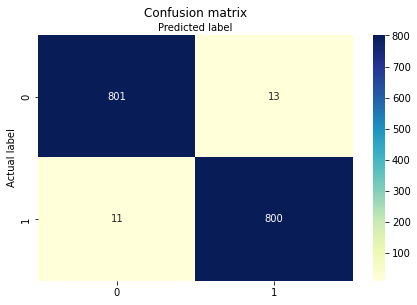

In [69]:
draw_confusion_matrix(SGDC,test_X,test_y)

In [70]:
# compare_RMSE(SGDC,train_X, train_y,test_X,test_y)

2.3 Random Forest

In [72]:
rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=0.2,random_state=1)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(test_X)
acc_rf = round(rf.score(test_X, test_y) * 100, 2)
print (str(acc_rf) + ' percent')

91.02 percent


In [73]:
precision_rf = metrics.precision_score(test_y, y_pred_rf)
recall_rf = metrics.recall_score(test_y, y_pred_rf)
f1_rf = metrics.f1_score(test_y, y_pred_rf)

print("Precision:",precision_rf)
print("Recall:",recall_rf)
print("F1:",f1_rf)

Precision: 0.9586206896551724
Recall: 0.8569667077681874
F1: 0.9049479166666666


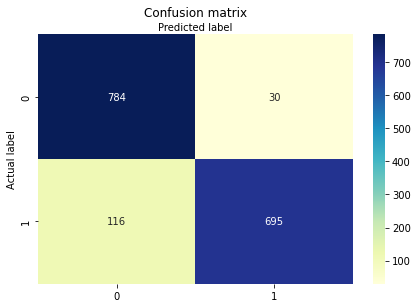

In [74]:
draw_confusion_matrix(rf,test_X,test_y)

In [75]:
compare_RMSE(rf,train_X, train_y,test_X,test_y)

Test set RMSE: 0.2997434800728013
CV RMSE: 0.3108568451736269
Training set RMSE: 0.3010470521178705


2.4 Decision Tree

In [77]:
dt = DecisionTreeClassifier(max_depth=10,
                           min_samples_leaf=0.18,
                           random_state=1)

# Fit dt to the training set
dt.fit(train_X, train_y)
y_pred_dt = dt.predict(test_X)
acc_dt = round(dt.score(test_X, test_y) * 100, 2)
print (str(acc_dt) + ' percent')

92.0 percent


In [78]:
precision_dt = metrics.precision_score(test_y, y_pred_dt)
recall_dt = metrics.recall_score(test_y, y_pred_dt)
f1_dt = metrics.f1_score(test_y, y_pred_dt)

print("Precision:",precision_dt)
print("Recall:",recall_dt)
print("F1:",f1_dt)

Precision: 0.8673139158576052
Recall: 0.9913686806411838
F1: 0.9252013808975835


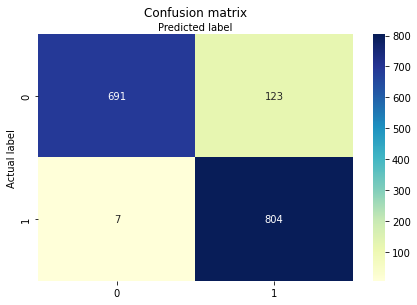

In [79]:
draw_confusion_matrix(dt,test_X,test_y)

In [80]:
compare_RMSE(dt,train_X, train_y,test_X,test_y)

Test set RMSE: 0.282842712474619
CV RMSE: 0.28123105996832765
Training set RMSE: 0.2812278269114342


2.5 SVC

In [81]:
svc = SVC(kernel='linear')
svc.fit(train_X,train_y)
y_pred_svc = svc.predict(test_X)
acc_svc=round(svc.score(test_X,test_y)*100,2)
print(str(acc_svc)+' percent')

98.46 percent


In [82]:
precision_svc = metrics.precision_score(test_y, y_pred_svc)
recall_svc = metrics.recall_score(test_y, y_pred_svc)
f1_svc = metrics.f1_score(test_y, y_pred_svc)

print("Precision:",precision_svc)
print("Recall:",recall_svc)
print("F1:",f1_svc)

Precision: 0.9839901477832512
Recall: 0.9852034525277436
F1: 0.984596426370918


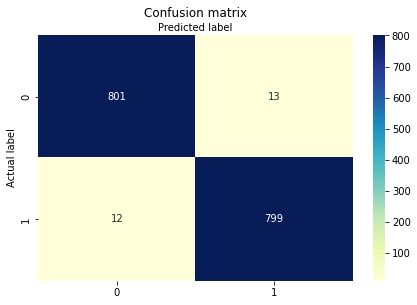

In [83]:
draw_confusion_matrix(svc,test_X,test_y)

In [84]:
compare_RMSE(svc,train_X, train_y,test_X,test_y)

Test set RMSE: 0.12403473458920845
CV RMSE: 0.09923614867448963
Training set RMSE: 0.09608428366609072


In [85]:
from sklearn.inspection import permutation_importance
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature Importance of SVC')
    plt.show()

In [86]:
feature_names = train_X.columns

In [88]:
models = pd.DataFrame({
    'Model':['Logistic Regression','SGDClassifier','Random Forest',
             'Decision Tree','SVC'],
    
    'Accuracy':[acc_log_reg,acc_SGDC ,acc_rf,acc_dt,acc_svc],
    'F1 Score':[f1_log_reg,f1_SGDC ,f1_rf,f1_dt,f1_svc]
})

models.sort_values(by = 'F1 Score', ascending = False)

,Model,Accuracy,F1 Score
1,SGDClassifier,98.52,0.985222
4,SVC,98.46,0.984596
0,Logistic Regression,98.15,0.981459
3,Decision Tree,92.00,0.925201
2,Random Forest,91.02,0.904948
